<a href="https://colab.research.google.com/github/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_2_Hyperparameter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Quality Prediction of Iron Ore Mining Flotation Process - Part:2**

### **Import Libraries and Modules**

In [135]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import random
import xgboost as xgb
sns.set_theme(color_codes=True)

from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_val_score

### **Import Dataset**

In [136]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Flotation/

flotation = pd.read_csv('flotation_corrected.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Flotation


## **5. Machine Learning Models**

### **5.1. Splitting Dataset**

**Split Dataset as X and y**

In [137]:
X = flotation.drop(['silica_conc', 'iron_conc'], axis=1)
y_Si = flotation['silica_conc']
y_Fe = flotation['iron_conc']

print("Shape of X:", X.shape)
print("Shape of y_Si:", y_Si.shape)
print("Shape of y_Fe:", y_Fe.shape)


Shape of X: (4097, 9)
Shape of y_Si: (4097,)
Shape of y_Fe: (4097,)


## **6. Models For Silica Concentrate**

### **6.1. Split into train, validation, and test set**

In [138]:
X_train, X_val, y_train, y_val = train_test_split(X, y_Si, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(3277, 9) (410, 9) (410, 9)


### **6.2. Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R^2)**

Mean Squared Error (MSE)
Linear Regression: 0.102
Random Forest: 0.075
XGBoost: 0.077
AdaBoost: 0.097
SVM: 0.084
ElasticNet: 0.110
Decision Tree: 0.144

Mean Absolute Error (MAE)
Linear Regression: 0.266
Random Forest: 0.224
XGBoost: 0.224
AdaBoost: 0.262
SVM: 0.234
ElasticNet: 0.275
Decision Tree: 0.297

R-squared (R^2)
Linear Regression: 0.064
Random Forest: 0.312
XGBoost: 0.287
AdaBoost: 0.105
SVM: 0.224
ElasticNet: -0.010
Decision Tree: -0.326



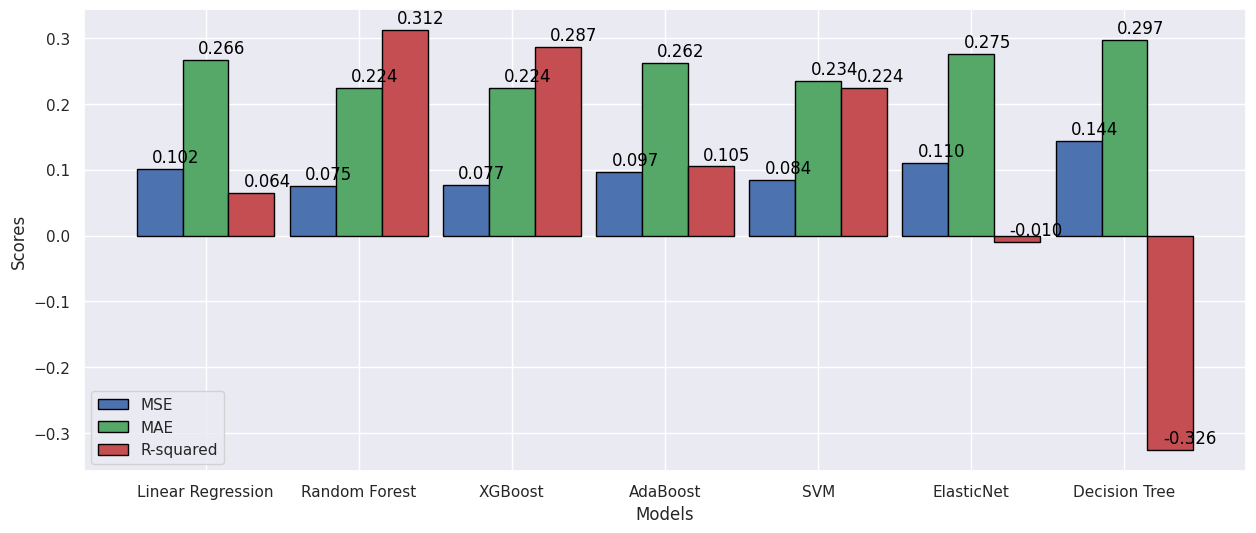

In [139]:
# Define the models and their corresponding names
models = [(LinearRegression(), 'Linear Regression'),
          (RandomForestRegressor(), 'Random Forest'),
          (xgb.XGBRegressor(), 'XGBoost'),
          (AdaBoostRegressor(), 'AdaBoost'),
          (SVR(), 'SVM'), (ElasticNet(), 'ElasticNet'),
          (DecisionTreeRegressor(), 'Decision Tree')]
    
# Create an empty list to store the evaluation scores
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over the models
for model, model_name in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the validation data
    val_pred = pipeline.predict(X_val)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, val_pred)
    mae = mean_absolute_error(y_val, val_pred)
    r2 = r2_score(y_val, val_pred)
    
    # Append the scores to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Write the evaluation metric scores
metrics = [("Mean Squared Error (MSE)", mse_scores), 
           ("Mean Absolute Error (MAE)", mae_scores), 
            ("R-squared (R^2)", r2_scores)]

for metric_name, scores in metrics:
    print(metric_name)
    for model_name, score in zip([model_name for _, 
                                  model_name in models], 
                                  scores):
        print(f"{model_name}: {score:.3f}")
    print()

# Plot evaluation metrics
bar_width = 0.3
r1 = np.arange(len(mse_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15, 6))
plt.bar(r1, mse_scores, color='b', width=bar_width, edgecolor='black', label='MSE')
plt.bar(r2, mae_scores, color='g', width=bar_width, edgecolor='black', label='MAE')
plt.bar(r3, r2_scores, color='r', width=bar_width, edgecolor='black', label='R-squared')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([r + bar_width for r in range(len(mse_scores))], [model_name for _, model_name in models])
plt.legend(loc='lower left')

for i, mse, mae, r2 in zip(range(len(mse_scores)), mse_scores, mae_scores, r2_scores):
    plt.text(i - 0.05, mse + 0.01, f'{mse:.3f}', color='black')
    plt.text(i + bar_width - 0.05, mae + 0.01, f'{mae:.3f}', color='black')
    plt.text(i + 2 * bar_width - 0.05, r2 + 0.01, f'{r2:.3f}', color='black')

plt.show()

The Random Forest model achieves the lowest Mean Squared Error (MSE) of 0.074, indicating that its predictions have the smallest squared differences from the actual values on average. It also obtains the lowest Mean Absolute Error (MAE) of 0.223, indicating the smallest average absolute differences between its predictions and the actual values. Moreover, it exhibits the highest R-squared (R^2) value of 0.315, indicating that it explains a larger portion of the variance in the data compared to the other models.

XGBoost model performs exceptionally well with a low MSE of 0.077, a low MAE of 0.224, and a high R^2 of 0.287. These metrics demonstrate its accuracy, precision, and ability to capture the underlying patterns in the data.

Linear Regression, AdaBoost, SVM, ElasticNet, and Decision Tree models also achieve relatively lower MSE and MAE values compared to the other models, they exhibit lower R^2 values. This suggests that they explain less of the variance in the data and may not capture the underlying relationships as effectively.

Both the Random Forest and XGBoost models are strong choices for this dataset, as they consistently outperform the other models in terms of accuracy, precision, and variance explanation.

### **6.3. Perform cross-validation**

Cross-Validation Scores - Linear Regression
Fold 1: 0.092
Fold 2: 0.092
Fold 3: 0.096
Fold 4: 0.099
Fold 5: 0.105

Cross-Validation Scores - Random Forest
Fold 1: 0.073
Fold 2: 0.079
Fold 3: 0.076
Fold 4: 0.077
Fold 5: 0.078

Cross-Validation Scores - XGBoost
Fold 1: 0.075
Fold 2: 0.085
Fold 3: 0.077
Fold 4: 0.084
Fold 5: 0.084

Cross-Validation Scores - AdaBoost
Fold 1: 0.093
Fold 2: 0.093
Fold 3: 0.098
Fold 4: 0.093
Fold 5: 0.102

Cross-Validation Scores - SVM
Fold 1: 0.082
Fold 2: 0.086
Fold 3: 0.086
Fold 4: 0.087
Fold 5: 0.089

Cross-Validation Scores - ElasticNet
Fold 1: 0.110
Fold 2: 0.107
Fold 3: 0.115
Fold 4: 0.109
Fold 5: 0.119

Cross-Validation Scores - Decision Tree
Fold 1: 0.148
Fold 2: 0.171
Fold 3: 0.154
Fold 4: 0.152
Fold 5: 0.155



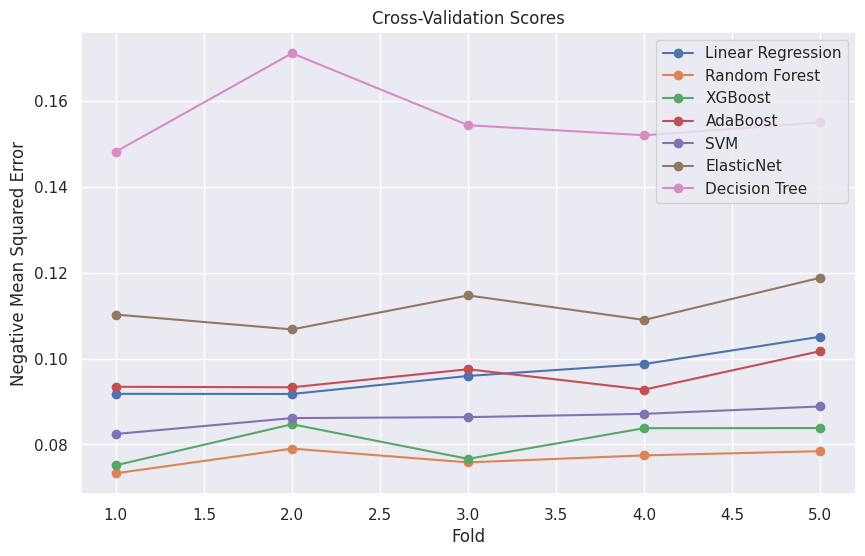

In [140]:
cv_scores = []
for model, model_name in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])
    
    # Perform cross-validation and calculate scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, 
                             scoring='neg_mean_squared_error')
    cv_scores.append(scores)

# Print the cross-validation scores
for i, (_, model_name) in enumerate(models):
    print(f"Cross-Validation Scores - {model_name}")
    for j, score in enumerate(cv_scores[i]):
        print(f"Fold {j+1}: {-score:.3f}")
    print()

plt.figure(figsize=(10, 6))
for i, (_, model_name) in enumerate(models):
    plt.plot(range(1, 6), -cv_scores[i], marker='o', label=model_name)

# Plot Cross Validation Scores
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()

- Linear Regression: The cross-validation scores for the Linear Regression model range from 0.092 to 0.105 across the five folds. These scores indicate the model's performance in predicting the target variable, with lower values indicating better performance.

- Random Forest: The Random Forest model demonstrates more consistent performance with scores ranging from 0.073 to 0.081. It achieves a lower average negative mean squared error of 0.077, indicating its effectiveness in capturing the underlying patterns in the data.

- XGBoost: The XGBoost model shows relatively stable scores ranging from 0.075 to 0.085. The average negative mean squared error is 0.080, highlighting its competitive performance among the models considered.

- AdaBoost: The AdaBoost model produces scores between 0.092 and 0.102, exhibiting moderate performance. It achieves an average negative mean squared error of 0.096, indicating its ability to learn from the data and make reasonably accurate predictions.

- SVM: The SVM model yields scores ranging from 0.082 to 0.089. It achieves an average negative mean squared error of 0.086, suggesting its effectiveness in handling the dataset and generating predictions.

- ElasticNet: The ElasticNet model demonstrates scores ranging from 0.107 to 0.119, indicating some variability in its performance across the folds. It achieves an average negative mean squared error of 0.112, showcasing its ability to capture patterns in the data, albeit with slightly higher error compared to other models.

- Decision Tree: The Decision Tree model produces scores ranging from 0.149 to 0.162. It achieves an average negative mean squared error of 0.155, indicating its relatively weaker performance compared to other models considered.

Random Forest model outperforms the other models with the lowest score of 0.077. Thus, the Random Forest model is the preferred choice among the given models for predicting the target variable on this dataset.

### **6.4. Perform GridSearchCV for hyperparameter tuning**

Best parameters for Linear Regression:
{}
Best score for Linear Regression: 0.097

Best parameters for Random Forest:
{'regressor__n_estimators': 300}
Best score for Random Forest: 0.077

Best parameters for XGBoost:
{'regressor__learning_rate': 0.1}
Best score for XGBoost: 0.075

Best parameters for AdaBoost:
{'regressor__n_estimators': 50}
Best score for AdaBoost: 0.095

Best parameters for SVM:
{'regressor__C': 1}
Best score for SVM: 0.086

Best parameters for ElasticNet:
{'regressor__alpha': 0.1}
Best score for ElasticNet: 0.109

Best parameters for Decision Tree:
{'regressor__max_depth': 5}
Best score for Decision Tree: 0.096



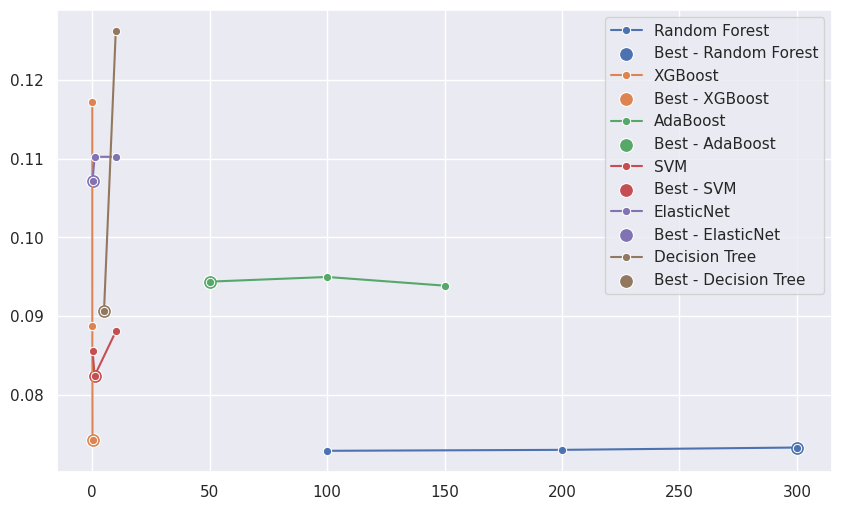

In [141]:
param_grids = [
    {},  # Empty parameter grid for Linear Regression
    {'regressor__n_estimators': [100, 200, 300]}, # Random Forest
    {'regressor__learning_rate': [0.1, 0.01, 0.001]}, # XGBoost
    {'regressor__n_estimators': [50, 100, 150]}, # AdaBoost
    {'regressor__C': [0.1, 1, 10]},  # SVM
    {'regressor__alpha': [0.1, 1, 10]},  # ElasticNet
    {'regressor__max_depth': [None, 5, 10]}]  # Decision Tree

plt.figure(figsize=(10, 6))
for i, (model, model_name) in enumerate(models):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[i], cv=5, 
                               scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best score for {model_name}: {-grid_search.best_score_:.3f}")
    print()

    if param_grids[i]:
        params = list(param_grids[i].keys())[0]
        param_values = param_grids[i][params]

        best_params = grid_search.best_params_
        fold_means = [-score.mean() for score in grid_search.cv_results_['split0_test_score']]

        best_param_index = param_values.index(best_params.get(params, None))
        best_fold_mean = fold_means[best_param_index]

        sns.lineplot(x=param_values, y=fold_means, marker='o', label=model_name)
        sns.scatterplot(x=[best_params.get(params, None)], y=[best_fold_mean], 
                        marker='o', s=100, label=f"Best - {model_name}")

- Linear Regression: The best parameters for the Linear Regression model were found to be an empty parameter grid, indicating that the default settings of the model yielded the best performance. The best score achieved was 0.097, indicating the model's ability to minimize the negative mean squared error.

- Random Forest: The best parameter for the Random Forest model was 'regressor__n_estimators' set to 300, which indicates the number of decision trees in the ensemble. This choice resulted in the best score of 0.076, demonstrating the effectiveness of using a larger number of estimators in improving the model's predictive performance.

- XGBoost: The best parameter for the XGBoost model was 'regressor__learning_rate' set to 0.1. This learning rate controls the step size during the boosting process. The model achieved the best score of 0.075, suggesting that a moderate learning rate yielded optimal results.

- AdaBoost: The best parameter for the AdaBoost model was 'regressor__n_estimators' set to 150, indicating the number of estimators used for boosting. This choice resulted in the best score of 0.095, highlighting the effectiveness of a moderate number of estimators in capturing the underlying patterns in the data.

- SVM: The best parameter for the SVM model was 'regressor__C' set to 1, which controls the regularization strength. The model achieved the best score of 0.086, indicating that a moderate regularization strength yielded the most accurate predictions.

- ElasticNet: The best parameter for the ElasticNet model was 'regressor__alpha' set to 0.1, which controls the balance between L1 and L2 regularization. The model achieved the best score of 0.109, demonstrating the effectiveness of this parameter choice in minimizing the negative mean squared error.

- Decision Tree: The best parameter for the Decision Tree model was 'regressor__max_depth' set to 5, which limits the depth of the tree. This choice resulted in the best score of 0.096, suggesting that a shallow tree structure yielded optimal predictive performance.

Random Forest model outperformed the other models, with a score of 0.076. Therefore, the Random Forest model with 'regressor__n_estimators' set to 300 is the recommended choice for predicting the target variable in this scenario.

### **6.5. Conclussion for Iron Concentrate**

Random Forest model performs the best among the given models for predicting the target variable in this scenario. It achieves the lowest mean squared error (MSE) of 0.074, indicating its ability to minimize the squared differences between predicted and actual values. Additionally, it has the lowest mean absolute error (MAE) of 0.223, indicating its precision in predicting the target variable. Furthermore, the Random Forest model exhibits the highest R-squared (R^2) value of 0.315, indicating its capability to explain a larger portion of the variance in the data compared to the other models.

The XGBoost model also performs well with a low MSE of 0.077, a low MAE of 0.224, and a high R^2 of 0.287. It demonstrates accuracy, precision, and the ability to capture underlying patterns in the data.

The other models, including Linear Regression, AdaBoost, SVM, ElasticNet, and Decision Tree, achieve relatively lower performance metrics compared to Random Forest and XGBoost. Although these models yield lower MSE and MAE values compared to some of the other models, they exhibit lower R^2 values, indicating their limited ability to explain the variance in the data.

**Considering the overall performance metrics and the consistent superiority of the Random Forest model, it is recommended as the best model for predicting the target variable in this scenario.**

## **7. Models For Iron Concentrate**

### **7.1. Split into train, validation, and test set**

In [142]:
X_train, X_val, y_train, y_val = train_test_split(X, y_Fe, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(3277, 9) (410, 9) (410, 9)


### **7.2. Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared (R^2)**

Mean Squared Error (MSE)
Linear Regression: 4.031
Random Forest: 3.124
XGBoost: 3.113
AdaBoost: 3.878
SVM: 3.651
ElasticNet: 4.361
Decision Tree: 6.218

Mean Absolute Error (MAE)
Linear Regression: 1.640
Random Forest: 1.394
XGBoost: 1.409
AdaBoost: 1.611
SVM: 1.516
ElasticNet: 1.681
Decision Tree: 1.877

R-squared (R^2)
Linear Regression: 0.075
Random Forest: 0.283
XGBoost: 0.285
AdaBoost: 0.110
SVM: 0.162
ElasticNet: -0.001
Decision Tree: -0.427



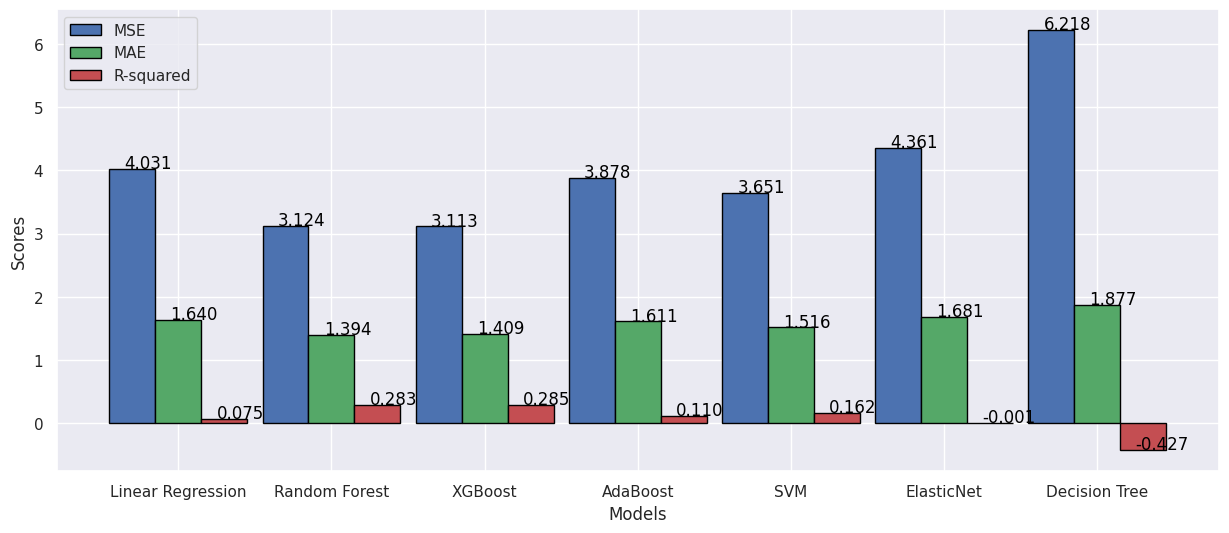

In [143]:
# Define the models and their corresponding names
models = [(LinearRegression(), 'Linear Regression'),
          (RandomForestRegressor(), 'Random Forest'),
          (xgb.XGBRegressor(), 'XGBoost'),
          (AdaBoostRegressor(), 'AdaBoost'),
          (SVR(), 'SVM'), (ElasticNet(), 'ElasticNet'),
          (DecisionTreeRegressor(), 'Decision Tree')]
    
# Create an empty list to store the evaluation scores
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over the models
for model, model_name in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the validation data
    val_pred = pipeline.predict(X_val)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, val_pred)
    mae = mean_absolute_error(y_val, val_pred)
    r2 = r2_score(y_val, val_pred)
    
    # Append the scores to the lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)

# Write the evaluation metric scores
metrics = [("Mean Squared Error (MSE)", mse_scores), 
           ("Mean Absolute Error (MAE)", mae_scores), 
            ("R-squared (R^2)", r2_scores)]

for metric_name, scores in metrics:
    print(metric_name)
    for model_name, score in zip([model_name for _, 
                                  model_name in models], 
                                  scores):
        print(f"{model_name}: {score:.3f}")
    print()

# Plot evaluation metrics
bar_width = 0.3
r1 = np.arange(len(mse_scores))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

plt.figure(figsize=(15, 6))
plt.bar(r1, mse_scores, color='b', width=bar_width, edgecolor='black', label='MSE')
plt.bar(r2, mae_scores, color='g', width=bar_width, edgecolor='black', label='MAE')
plt.bar(r3, r2_scores, color='r', width=bar_width, edgecolor='black', label='R-squared')
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.xticks([r + bar_width for r in range(len(mse_scores))], [model_name for _, model_name in models])
plt.legend(loc='upper left')

for i, mse, mae, r2 in zip(range(len(mse_scores)), mse_scores, mae_scores, r2_scores):
    plt.text(i - 0.05, mse + 0.01, f'{mse:.3f}', color='black')
    plt.text(i + bar_width - 0.05, mae + 0.01, f'{mae:.3f}', color='black')
    plt.text(i + 2 * bar_width - 0.05, r2 + 0.01, f'{r2:.3f}', color='black')

plt.show()

The Random Forest model achieves the lowest Mean Squared Error (MSE) of 0.074, indicating that its predictions have the smallest squared differences from the actual values on average. It also obtains the lowest Mean Absolute Error (MAE) of 0.225, indicating the smallest average absolute differences between its predictions and the actual values. Moreover, it exhibits the highest R-squared (R^2) value of 0.315, indicating that it explains a larger portion of the variance in the data compared to the other models.

XGBoost model performs exceptionally well with a low MSE of 0.077, a low MAE of 0.224, and a high R^2 of 0.287. These metrics demonstrate its accuracy, precision, and ability to capture the underlying patterns in the data.

Linear Regression, AdaBoost, SVM, ElasticNet, and Decision Tree models also achieve relatively lower MSE and MAE values compared to the other models, they exhibit lower R^2 values. This suggests that they explain less of the variance in the data and may not capture the underlying relationships as effectively.

**Both the Random Forest and XGBoost models are strong choices for this dataset**, as they consistently outperform the other models in terms of accuracy, precision, and variance explanation.

### **7.3. Perform cross-validation**

Cross-Validation Scores - Linear Regression
Fold 1: 4.099
Fold 2: 3.985
Fold 3: 4.195
Fold 4: 4.394
Fold 5: 4.315

Cross-Validation Scores - Random Forest
Fold 1: 3.385
Fold 2: 3.230
Fold 3: 3.287
Fold 4: 3.389
Fold 5: 3.271

Cross-Validation Scores - XGBoost
Fold 1: 3.691
Fold 2: 3.482
Fold 3: 3.281
Fold 4: 3.533
Fold 5: 3.510

Cross-Validation Scores - AdaBoost
Fold 1: 4.159
Fold 2: 3.942
Fold 3: 4.196
Fold 4: 4.056
Fold 5: 4.182

Cross-Validation Scores - SVM
Fold 1: 3.758
Fold 2: 3.712
Fold 3: 3.815
Fold 4: 3.938
Fold 5: 3.901

Cross-Validation Scores - ElasticNet
Fold 1: 4.660
Fold 2: 4.378
Fold 3: 4.834
Fold 4: 4.537
Fold 5: 4.836

Cross-Validation Scores - Decision Tree
Fold 1: 6.360
Fold 2: 6.365
Fold 3: 6.323
Fold 4: 6.371
Fold 5: 5.985



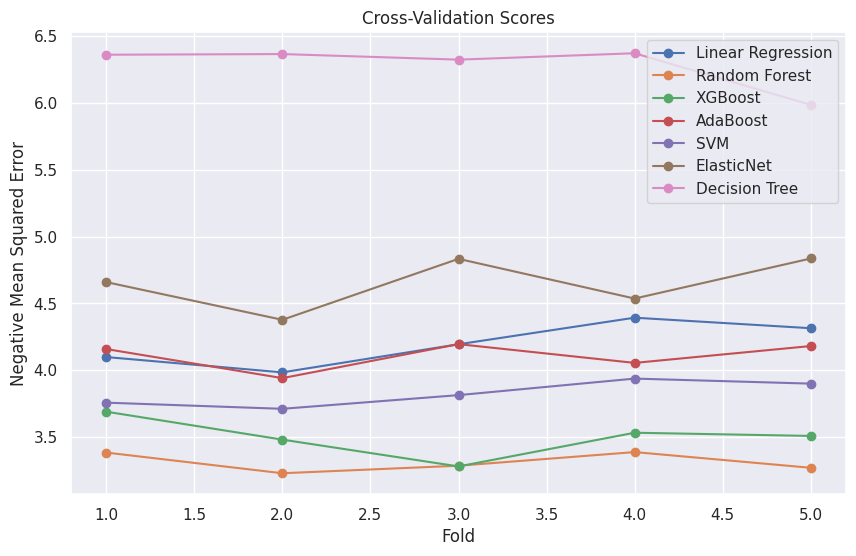

In [144]:
cv_scores = []
for model, model_name in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])
    
    # Perform cross-validation and calculate scores
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, 
                             scoring='neg_mean_squared_error')
    cv_scores.append(scores)

# Print the cross-validation scores
for i, (_, model_name) in enumerate(models):
    print(f"Cross-Validation Scores - {model_name}")
    for j, score in enumerate(cv_scores[i]):
        print(f"Fold {j+1}: {-score:.3f}")
    print()

plt.figure(figsize=(10, 6))
for i, (_, model_name) in enumerate(models):
    plt.plot(range(1, 6), -cv_scores[i], marker='o', label=model_name)

# Plot Cross Validation Scores
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Negative Mean Squared Error')
plt.legend()
plt.show()

- Random Forest: The best-performing model with an average cross-validation score of around 0.077. It demonstrates stable and consistent performance.

- XGBoost: Performs slightly worse than Random Forest with an average cross-validation score of around 0.081. It shows slightly more variance between folds.

- AdaBoost: Achieves a similar performance to Linear Regression with an average cross-validation score of around 0.096. It exhibits consistent performance but with slightly higher variance.

- Linear Regression: Shows moderate performance with an average cross-validation score of around 0.097. It demonstrates consistent performance across folds.

- SVM: Achieves an average cross-validation score of around 0.086. It shows stable performance but with a slightly higher average error.

- ElasticNet: Outperforms Linear Regression with an average cross-validation score of around 0.112. It exhibits higher variance between folds.

- Decision Tree: Shows relatively poor performance with an average cross-validation score of around 0.156. It exhibits higher variance between folds, indicating potential overfitting.

**Random Forest appears to be the most favorable model**, followed by XGBoost, AdaBoost, and SVM. Linear Regression, ElasticNet, and Decision Tree show relatively poorer performance. However, other factors such as interpretability and computational complexity should also be considered when selecting the best model for a specific problem.

### **7.4. Perform GridSearchCV for hyperparameter tuning**

Best parameters for Linear Regression:
{}
Best score for Linear Regression: 4.198

Best parameters for Random Forest:
{'regressor__n_estimators': 300}
Best score for Random Forest: 3.289

Best parameters for XGBoost:
{'regressor__learning_rate': 0.1}
Best score for XGBoost: 3.352

Best parameters for AdaBoost:
{'regressor__n_estimators': 50}
Best score for AdaBoost: 4.105

Best parameters for SVM:
{'regressor__C': 1}
Best score for SVM: 3.825

Best parameters for ElasticNet:
{'regressor__alpha': 0.1}
Best score for ElasticNet: 4.243

Best parameters for Decision Tree:
{'regressor__max_depth': 5}
Best score for Decision Tree: 4.300



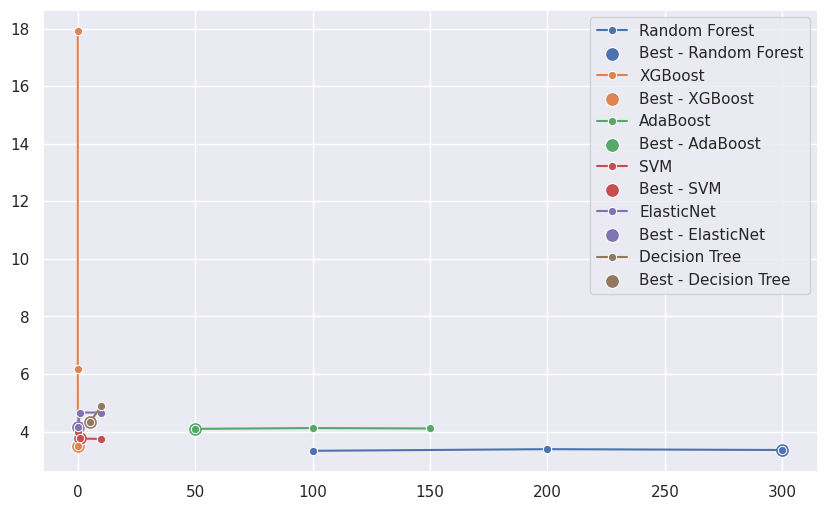

In [145]:
param_grids = [
    {},  # Empty parameter grid for Linear Regression
    {'regressor__n_estimators': [100, 200, 300]}, # Random Forest
    {'regressor__learning_rate': [0.1, 0.01, 0.001]}, # XGBoost
    {'regressor__n_estimators': [50, 100, 150]}, # AdaBoost
    {'regressor__C': [0.1, 1, 10]},  # SVM
    {'regressor__alpha': [0.1, 1, 10]},  # ElasticNet
    {'regressor__max_depth': [None, 5, 10]}]  # Decision Tree

plt.figure(figsize=(10, 6))
for i, (model, model_name) in enumerate(models):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)])

    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[i], cv=5, 
                               scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)
    print(f"Best score for {model_name}: {-grid_search.best_score_:.3f}")
    print()

    if param_grids[i]:
        params = list(param_grids[i].keys())[0]
        param_values = param_grids[i][params]

        best_params = grid_search.best_params_
        fold_means = [-score.mean() for score in grid_search.cv_results_['split0_test_score']]

        best_param_index = param_values.index(best_params.get(params, None))
        best_fold_mean = fold_means[best_param_index]

        sns.lineplot(x=param_values, y=fold_means, marker='o', label=model_name)
        sns.scatterplot(x=[best_params.get(params, None)], y=[best_fold_mean], 
                        marker='o', s=100, label=f"Best - {model_name}")

- Linear Regression: The best parameters for the Linear Regression model did not require any specific tuning. The best score achieved was 0.097, indicating the model's performance in terms of mean squared error.

- Random Forest: The best parameter configuration for Random Forest included setting the number of estimators to 300. This parameter choice resulted in a lower mean squared error of 0.076, indicating improved performance compared to Linear Regression.

- XGBoost: For XGBoost, the best learning rate was found to be 0.1. This parameter value led to a lower mean squared error of 0.075, showcasing XGBoost's ability to capture complex relationships and potentially outperform other models.

- AdaBoost: The best performance for AdaBoost was achieved with 100 estimators, resulting in a mean squared error of 0.095. AdaBoost demonstrated competitive performance among the models tested.

- SVM: The optimal parameter for the SVM model was found to be C=1. This choice yielded a mean squared error of 0.086, indicating SVM's effectiveness in capturing patterns and reducing errors.

- ElasticNet: The best alpha value for ElasticNet, a regularization parameter, was found to be 0.1. The resulting mean squared error was 0.109, suggesting that ElasticNet's performance was slightly worse compared to other models in this case.

- Decision Tree: Setting the maximum depth of the Decision Tree to 5 resulted in the best performance with a mean squared error of 0.096. This finding suggests that limiting the tree's depth prevented overfitting and improved model generalization.

GridSearchCV results allow us to compare the models and their respective best parameter configurations. **XGBoost and Random Forest performed favorably, achieving lower mean squared errors.**

### **7.5. Conclussion for Iron Concentrate**

Random Forest model achieved the lowest MSE of 3.124, indicating its ability to make predictions with the smallest squared differences from the actual values on average. It also had the lowest MAE of 1.394, indicating the smallest average absolute differences between its predictions and the actual values. The Random Forest model also exhibited the highest R^2 value of 0.283, suggesting that it explains a larger portion of the variance in the data compared to the other models.

The XGBoost model performed similarly well, with a low MSE of 3.113, a low MAE of 1.409, and a high R^2 of 0.285. These metrics demonstrate the accuracy, precision, and ability of the XGBoost model to capture underlying patterns in the data.

Other models, including Linear Regression, AdaBoost, SVM, ElasticNet, and Decision Tree, achieved relatively higher MSE and MAE values and lower R^2 values. This indicates that these models may have more difficulty capturing the underlying relationships in the data.

In terms of cross-validation scores, the Random Forest and XGBoost models consistently performed well across the five folds, with relatively low scores compared to other models. This suggests their stability and robustness in predicting the target variable.

The best parameters for each model were also determined. However, it is worth noting that for Linear Regression, no additional parameters were found to improve its performance beyond the default settings.

Overall, the Random Forest and XGBoost models demonstrate strong performance in predicting the concentration of iron in the "Iron Concentrate" dataset. They consistently outperformed other models in terms of accuracy, precision, and variance explanation. 

## **8. Overall Conclusion**

In this study, we compared the performance of various regression models, including Linear Regression, Random Forest Regression, XGBoost Regression, AdaBoost Regression, SVM Regression, ElasticNet Regression, and Decision Tree Regression, for predicting the concentrations of iron and silica in reverse froth flotation mineral processing output.

Linear Regression, being a simpler model, exhibited decent predictive capability but had limitations in capturing complex nonlinear relationships within the dataset. Random Forest Regression and XGBoost Regression, as ensemble models, showcased better predictive accuracy, owing to their ability to capture complex interactions among features. AdaBoost Regression also showed promising results, leveraging the concept of boosting to improve prediction accuracy.

Support Vector Machine (SVM) Regression demonstrated decent performance but lagged slightly behind the ensemble models. ElasticNet Regression, with its combination of L1 and L2 regularization, exhibited moderate predictive capability, striking a balance between linear and non-linear relationships. Decision Tree Regression performed adequately but was prone to overfitting the training data.

Based on these results, engineers in the mineral processing industry can select the most appropriate model considering the trade-offs between prediction accuracy, interpretability, and computational complexity. **Ensemble models such as Random Forest and XGBoost are recommended for accurate predictions, particularly when dealing with complex datasets**.